In [1]:
# Importando bibliotecas importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importando os csvs
reviews1_df = pd.read_csv("reviews_0-250.csv")
reviews2_df = pd.read_csv("reviews_250-500.csv")
reviews3_df = pd.read_csv("reviews_500-750.csv")
reviews4_df = pd.read_csv("reviews_750-1250.csv")
reviews5_df = pd.read_csv("reviews_1250-end.csv")

C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\2754489263.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews1_df = pd.read_csv("reviews_0-250.csv")
C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\2754489263.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews4_df = pd.read_csv("reviews_750-1250.csv")
C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\2754489263.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews5_df = pd.read_csv("reviews_1250-end.csv")


In [3]:
# Juntando os dataframes de reviews
df_reviews = pd.concat([reviews1_df,reviews2_df,reviews3_df,reviews4_df,reviews5_df],axis=0)
print("df_reviews shape: ",df_reviews.shape)

df_reviews shape:  (1094411, 19)


In [4]:
df_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
print(df_reviews.dtypes)

Unnamed: 0                    int64
author_id                    object
rating                        int64
is_recommended              float64
helpfulness                 float64
total_feedback_count          int64
total_neg_feedback_count      int64
total_pos_feedback_count      int64
submission_time              object
review_text                  object
review_title                 object
skin_tone                    object
eye_color                    object
skin_type                    object
hair_color                   object
product_id                   object
product_name                 object
brand_name                   object
price_usd                   float64
dtype: object


In [6]:
# Verificando a quantidade de valores nulos
df_reviews.isna().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [7]:
# Dropar a coluna unnamed, que é causada por um erro nos csvs
df_reviews.drop(columns="Unnamed: 0", inplace=True)

In [8]:
# Verificando as colunas
df_reviews.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [9]:
# Verificando como são os dados da coluna "is_recommended"
df_reviews["is_recommended"].unique()

array([ 1.,  0., nan])

In [10]:
# Verificando métricas estatísticas
df_reviews.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06
mean,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01
std,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01
max,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03


Percebe-se que 75% dos dados da coluna rating são maiores que 4, comportamento sustentado pela coluna is_recommended.

<Axes: >

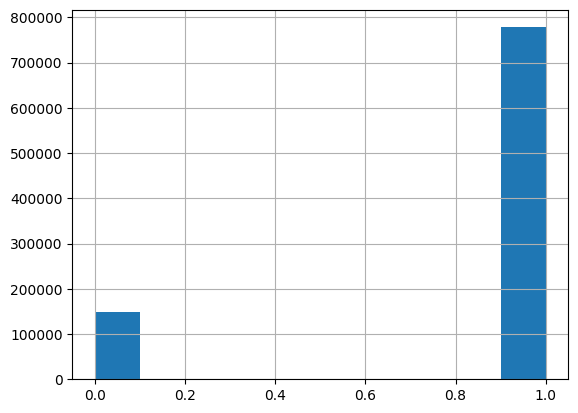

In [11]:
# Verificar a distribuição da coluna "is_recommended"
df_reviews["is_recommended"].hist()

In [12]:
# Selecionar as colunas que não serão necessárias para o projeto
columns_notsentiment = ['author_id', 'rating', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd']

# Dropando as colunas
df_sentiment = df_reviews.drop(columns_notsentiment, axis=1)

In [13]:
# Verificando valores nulos
df_sentiment.isnull().count()

is_recommended    1094411
review_text       1094411
dtype: int64

In [14]:
# Dropar linhas nulas
df_sentiment.dropna(axis=0, inplace=True)

In [15]:
df_sentiment.head()

,is_recommended,review_text
0,1.0,I use this with the Nudestix “Citrus Clean Bal...
1,0.0,I bought this lip mask after reading the revie...
2,1.0,My review title says it all! I get so excited ...
3,1.0,I’ve always loved this formula for a long time...
4,1.0,"If you have dry cracked lips, this is a must h..."


In [16]:
# Trocando os valores da coluna "is_recommended" para -1 e 1 e trocando o nome
df_sentiment['label'] = df_sentiment['is_recommended'].map({0: -1, 1: 1})

In [17]:
# Deixando o nome da coluna "review_text" para um mais simples
df_sentiment['review'] = df_sentiment["review_text"]

In [18]:
colunas = ['is_recommended', 'review_text']

df_sentiment.drop(colunas, axis=1, inplace=True)

In [19]:
df_sentiment.head()

,label,review
0,1,I use this with the Nudestix “Citrus Clean Bal...
1,-1,I bought this lip mask after reading the revie...
2,1,My review title says it all! I get so excited ...
3,1,I’ve always loved this formula for a long time...
4,1,"If you have dry cracked lips, this is a must h..."


In [20]:
# Diminuindo o tamanho da amostra para diminuir o tempo de processamento
df_amostra = df_sentiment.sample(n=3000, random_state=42)

In [21]:
# Importando o VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [22]:
# Aplicando o VADER na amostra
for index, row in df_amostra.iterrows():
    text = row['review']

    scores = sid.polarity_scores(text)

    df_amostra.at[index, 'neg'] = scores['neg']
    df_amostra.at[index, 'neu'] = scores['neu']
    df_amostra.at[index, 'pos'] = scores['pos']
    df_amostra.at[index, 'compound'] = scores['compound']


print(df_amostra.head())

        label                                             review    neg  \
19619       1  I love the moisturizer! It has such a great te...  0.000   
208964      1  So amazing it smells so good and doesnt dry my...  0.000   
142324      1  I absolutely love this face mask. I use it eve...  0.100   
7492        1  Gifted by the outset. This is the first time i...  0.025   
569881      1  Love this stuff!  Makes my skin feel great wit...  0.000   

          neu    pos  compound  
19619   0.751  0.249    0.9508  
208964  0.641  0.359    0.8331  
142324  0.781  0.119   -0.3407  
7492    0.762  0.213    0.9334  
569881  0.512  0.488    0.8622  


In [23]:
# Verificando quantas e quais linhas foram interpretadas como neutras
print(df_amostra[df_amostra["compound"] == 0])

        label                                             review    neg  \
98217       1  Daily must needed . As I don’t do makeup every...  0.000   
464617      1  I’ve repurchased this twice because it hydrate...  0.000   
146862      1  this lightweight gel-cream moisturizer. Made m...  0.000   
174808      1  Amo este humectante, se seca rápido y la piel ...  0.000   
188055      1  I put this on many hours ago and haven’t put a...  0.000   
480573      1  ok, im gonna keep it 100 here, i have been usi...  0.000   
15361       1  Expensive yet it works. I use it together with...  0.000   
110160      1  This product helped when adding moisture that ...  0.000   
21374      -1  Stinging/burning sensitive skin (No sensitivit...  0.000   
185655     -1  Dint work for me.Used it for months but my acn...  0.000   
71308       1  This is my go to nighttime serum. I really saw...  0.000   
500543     -1  This balm does not emulsify completely and lea...  0.000   
164874      1            

In [24]:
# Deletando as frases consideradas neutras
neutral = df_amostra[df_amostra["compound"] == 0]

df_sentiment_vader = df_amostra.drop(neutral.index)

In [26]:
df_sentiment_vader.count()

label       2942
review      2942
neg         2942
neu         2942
pos         2942
compound    2942
dtype: int64

In [30]:
# Criando uma coluna para armazenar se foi um erro ou certo
def conf_matrix(x):
  if x[0] == 1 and x[5] > 0:
    return 'TP'
  elif x[0] == 1 and x[5] < 0:
    return 'FN'
  elif x[0] == -1 and x[5] > 0:
    return 'FP'
  elif x[0] == -1 and x[5] < 0:
    return 'TN'
  else:
    return 0
    
df_sentiment_vader['Conf_Matrix'] = df_sentiment_vader.apply(lambda x: conf_matrix(x), axis=1)

C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\782170959.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] == 1 and x[5] > 0:
C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\782170959.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif x[0] == 1 and x[5] < 0:
C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\782170959.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif x[0] == -1 and x[5] > 0:
C:

In [31]:
df_sentiment_vader.tail(1)

,label,review,neg,neu,pos,compound,Conf_Matrix
18589,1,I loved the packaging and texture of the produ...,0.0,0.796,0.204,0.8678,TP


In [32]:
# Imprimindo algumas métricas interessantes
conf_vals = df_sentiment_vader.Conf_Matrix.value_counts().to_dict()
print(conf_vals)

accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])
recall = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score = 2*(precision*recall) / (precision + recall)
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision, 2),'%',
      '\nRecall: ', round(100 * recall, 2),'%',
      '\nF1_Score:', f1_score)

{'TP': 2374, 'FP': 335, 'TN': 148, 'FN': 85}
Accuracy:  85.72 % 
Precision:  87.63 % 
Recall:  96.54 % 
F1_Score: 0.9187306501547989


roBERTa

Agora, vamos testar o RoBERTa no conjunto de dados

In [36]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

C:\Users\018118631\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
# Selecionando o modelo de base
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

In [38]:
# Carregar o tokenizador e o modelo RoBERTa pré-treinado
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL, max_length = 512)

In [40]:
# Pré-processar o conjunto de dados
def tokenization(text):
    print(text)
    return tokenizer(text['review'], return_tensors='pt', padding = True, truncation = True)


df_amostra["tokenized_text"] = df_amostra.apply(lambda row: tokenization, axis=1)

In [41]:
df_amostra.head(1)

,label,review,tokenized_text
19619,1,I love the moisturizer! It has such a great te...,<function tokenization at 0x0000023397288860>


In [42]:
from scipy.special import softmax

# Função para usar o modelo no conjunto de dados
def roberta_polarity_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt',truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]}
    return scores_dict

In [43]:
result = {}
for review in df_amostra['review']:
    result.update(roberta_polarity_scores(review))

KeyboardInterrupt: 

In [ ]:
result

In [ ]:
result = df_amostra["result"]

In [44]:
df_amostra.head(1)

,label,review,tokenized_text
19619,1,I love the moisturizer! It has such a great te...,<function tokenization at 0x0000023397288860>


In [45]:
def roberta_polarity_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores[0], scores[1], scores[2]

# Aplicar a função roberta_polarity_scores a cada linha do DataFrame
df_amostra['roberta_neg'], df_amostra['roberta_neu'], df_amostra['roberta_pos'] = zip(*df_amostra['review'].apply(roberta_polarity_scores))

# Calcular o score compound
df_amostra['compound'] = df_amostra['roberta_pos'] - df_amostra['roberta_neg']

# Mostrar as primeiras linhas do DataFrame com as colunas adicionadas
print(df_amostra.head())

        label                                             review  \
19619       1  I love the moisturizer! It has such a great te...   
208964      1  So amazing it smells so good and doesnt dry my...   
142324      1  I absolutely love this face mask. I use it eve...   
7492        1  Gifted by the outset. This is the first time i...   
569881      1  Love this stuff!  Makes my skin feel great wit...   

                                       tokenized_text  roberta_neg  \
19619   <function tokenization at 0x0000023397288860>     0.001204   
208964  <function tokenization at 0x0000023397288860>     0.002356   
142324  <function tokenization at 0x0000023397288860>     0.003118   
7492    <function tokenization at 0x0000023397288860>     0.005684   
569881  <function tokenization at 0x0000023397288860>     0.001148   

        roberta_neu  roberta_pos  compound  
19619      0.007111     0.991685  0.990480  
208964     0.007858     0.989787  0.987431  
142324     0.018708     0.978174  0

In [49]:
#vou ignorar frases consideradas neutras
neutral = df_amostra[df_amostra["compound"] == 0]

df_sentiment_roberta = df_amostra.drop(neutral.index)

In [50]:
df_sentiment_roberta.head(1)

,label,review,tokenized_text,roberta_neg,roberta_neu,roberta_pos,compound
19619,1,I love the moisturizer! It has such a great te...,<function tokenization at 0x0000023397288860>,0.001204,0.007111,0.991685,0.99048


In [51]:
df_sentiment_roberta["compound"].describe()

count    3000.000000
mean        0.679487
std         0.556007
min        -0.977956
25%         0.741100
50%         0.959727
75%         0.983560
max         0.991933
Name: compound, dtype: float64

In [64]:
df_sentiment_roberta.columns

Index(['label', 'review', 'tokenized_text', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'compound', 'Conf_Matrix'],
      dtype='object')

In [65]:
def conf_matrix(x):
  if x[0] == 1 and x[6] > 0:
    return 'TP'
  elif x[0] == 1 and x[6] < 0:
    return 'FN'
  elif x[0] == -1 and x[6] > 0:
    return 'FP'
  elif x[0] == -1 and x[6] < 0:
    return 'TN'
  else:
    return 0
    
df_sentiment_roberta['Conf_Matrix'] = df_sentiment_roberta.apply(lambda x: conf_matrix(x), axis=1)

C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\1852277079.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] == 1 and x[6] > 0:
C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\1852277079.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif x[0] == 1 and x[6] < 0:
C:\Users\018118631\AppData\Local\Temp\ipykernel_66324\1852277079.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif x[0] == -1 and x[6] > 0:

In [66]:
df_sentiment_roberta.head()

,label,review,tokenized_text,roberta_neg,roberta_neu,roberta_pos,compound,Conf_Matrix
19619,1,I love the moisturizer! It has such a great te...,<function tokenization at 0x0000023397288860>,0.001204,0.007111,0.991685,0.990480,TP
208964,1,So amazing it smells so good and doesnt dry my...,<function tokenization at 0x0000023397288860>,0.002356,0.007858,0.989787,0.987431,TP
142324,1,I absolutely love this face mask. I use it eve...,<function tokenization at 0x0000023397288860>,0.003118,0.018708,0.978174,0.975056,TP
7492,1,Gifted by the outset. This is the first time i...,<function tokenization at 0x0000023397288860>,0.005684,0.017275,0.977041,0.971357,TP
569881,1,Love this stuff! Makes my skin feel great wit...,<function tokenization at 0x0000023397288860>,0.001148,0.007399,0.991453,0.990305,TP


In [67]:
conf_vals = df_sentiment_roberta.Conf_Matrix.value_counts().to_dict()
print(conf_vals)

accuracy = (conf_vals['TP'] + conf_vals['TN']) / (conf_vals['TP'] + conf_vals['TN'] + conf_vals['FP'] + conf_vals['FN'])
precision = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FP'])
recall = conf_vals['TP'] / (conf_vals['TP'] + conf_vals['FN'])
f1_score = 2*(precision*recall) / (precision + recall)
print('Accuracy: ', round(100 * accuracy, 2),'%',
      '\nPrecision: ', round(100 * precision, 2),'%',
      '\nRecall: ', round(100 * recall, 2),'%',
      '\nF1_Score:', f1_score)

{'TP': 2425, 'TN': 338, 'FP': 162, 'FN': 75}
Accuracy:  92.1 % 
Precision:  93.74 % 
Recall:  97.0 % 
F1_Score: 0.9534106546097896


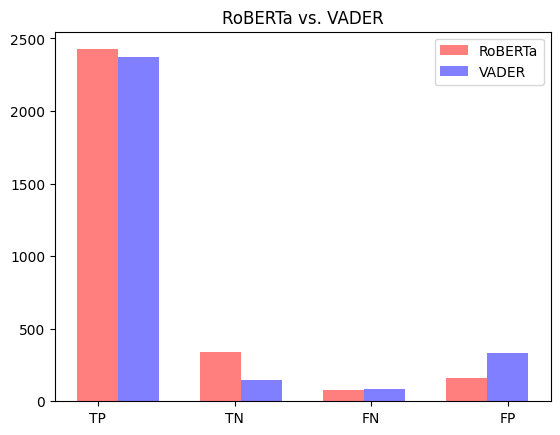

In [68]:
import matplotlib.pyplot as plt

# Histogramas de Erros e Acertos
plt.hist(df_sentiment_roberta['Conf_Matrix'], alpha=0.5, label='RoBERTa', color="Red", align='left')
plt.hist(df_sentiment_vader['Conf_Matrix'], alpha=0.5, label='VADER', color="Blue", align='right')
plt.legend(loc='upper right')
plt.title("RoBERTa vs. VADER")
plt.show()


Para o dataset em questão, o RoBERTa performa melhor.